### 4.1 누락된 데이터 다루기

#### 4.1.1 테이블 형태 데이터에서 누락된 값 식별

In [1]:
import pandas as pd
from io import StringIO

csv_data = '''
A,B,C,D
1.0, 2.0, 3.0, 4.0
5.0, 6.0,, 8.0
10.0, 11.0, 12.0'''

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [2]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

#### 4.1.2 누락된 값이 있는 훈련 샘플이나 특성 제외

In [3]:
df.dropna(axis=0) # NaN이 있는 행 제거

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [4]:
df.dropna(axis=1) # NaN이 있는 열 제거

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [5]:
df.dropna(how='all') # 모든 열이 NaN일 떄만 행을 삭제

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [6]:
df.dropna(thresh=4) # NaN이 아닌 값이 4개보다 작은 행을 삭제

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [7]:
df.dropna(subset=['C']) # 특저 ㅇ열에 NaN이 있는 행만 삭제

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


#### 4.1.3 누락된 값 대체

In [8]:
# 방법1
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='mean') # 각 특성 열에서 계산한 평균으로 바꿈, strategy에는 median, most_frequent이 있음
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [9]:
# 방법2
df.fillna(df.mean())

df.fillna(method='bfill') # 누락된 값을 다음 행의 값으로 채움
df.fillna(method='ffill') # 누락된 값을 이전 행의 값으로 채움
df.fillna(method='ffill', axis=1) # 행 대신 열의 값으로 함

C:\Users\cho03\AppData\Local\Temp\ipykernel_19668\529794127.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill') # 누락된 값을 다음 행의 값으로 채움
C:\Users\cho03\AppData\Local\Temp\ipykernel_19668\529794127.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill') # 누락된 값을 이전 행의 값으로 채움
C:\Users\cho03\AppData\Local\Temp\ipykernel_19668\529794127.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', axis=1) # 행 대신 열의 값으로 함


,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,6.0,8.0
2,10.0,11.0,12.0,12.0


#### 4.1.4 사이킷런 추정기 API 익히기

변환기 API : 데이터 변환에 관련된 파이썬 클래스 구현 가능   
- fit : 훈련 데이터에서 모델 파라미터 학습
- transform : 학습한 파라미터로 데이터를 변환
- 변환하려는 데이터 배열은 모델 학습에 사용한 데이터의 특성 개수와 같아야 함

### 4.2 범주형 데이터 다루기

- 순서가 있는 범주형 데이터
- 순서가 없는 범주형 데이터

#### 4.2.1 판다스를 사용한 범주형 데이터 인코딩

In [10]:
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color','size','price','classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


#### 4.2.2 순서가 있는 특성 매핑

In [11]:
size_mapping = {'XL':3, 'L':2,'M':1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [12]:
# 원상복구
inv_size_mapping = {v: k for k, v, in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

#### 4.2.3 클래스 레이블 인코딩(순서가 없는 범주형 데이터)

In [13]:
## 방법1
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [14]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [15]:
# 원상복구
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [16]:
## 다른 방법
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [17]:
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

#### 4.2.4 순서가 없는 특성에 원-핫 인코딩 적용

In [18]:
X = df[['color', 'size', 'price']].values
X
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

**순서가 없는 데이터를 0, 1, 2 이런 식으로 바꾸면 순서가 있다고 판단 -> 원-핫 인코딩 사용**

In [19]:
# 방법1
from sklearn.preprocessing import OneHotEncoder
X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:,0].reshape(-1, 1)).toarray() # 배열의 다른 두 열을 수정하지 않기 위해 하나의 열(X[:,0].reshape(-1, 1))에만 적용

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [20]:
from sklearn.compose import ColumnTransformer # 여러 개의 특성이 있는 배열에서 특정 열만 변환하기 위해 사용

X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([
    ('onehot', OneHotEncoder(dtype=int), [0]), # 첫번째 열만 변환
    ('nothing','passthrough',[1,2]) # 나머지 두 열은 변경하지 않고 그대로 두기 위해 'passthrough'로 지정
])
c_transf.fit_transform(X)

array([[0, 1, 0, 1, 10.1],
       [0, 0, 1, 2, 13.5],
       [1, 0, 0, 3, 15.3]], dtype=object)

In [21]:
# 방법2(판다스 get_dummies)
pd.get_dummies(df[['price', 'color', 'size']])

# pd.get_dummies(df[['price', 'color', 'size']], columns=['size]) # columns 매개변수를 사용하여 변환하려는 특성을 구체적으로 지정


,price,size,color_blue,color_green,color_red
0,10.1,1,False,True,False
1,13.5,2,False,False,True
2,15.3,3,True,False,False


**※ 원-핫 인코딩할 때 *다중 공선성*  문제를 유념 ※**  
  
특성 간의 상관관계가 높으면 역행렬을 계산하기 어려워 수치적으로 불안정   
-> 상관관계를 감소하려면 원-핫 인코디오딘 배열에서 특성 열 하나를 삭제(문제는 없음)

In [22]:
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,True,False
1,13.5,2,False,True
2,15.3,3,False,False


In [23]:
from sklearn.compose import ColumnTransformer # 여러 개의 특성이 있는 배열에서 특정 열만 변환하기 위해 사용

color_ohe = OneHotEncoder(categories='auto', drop='first')
X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([
    ('onehot', color_ohe, [0]), # 첫번째 열만 변환
    ('nothing','passthrough',[1,2]) # 나머지 두 열은 변경하지 않고 그대로 두기 위해 'passthrough'로 지정
])
c_transf.fit_transform(X)

array([[1.0, 0.0, 1, 10.1],
       [0.0, 1.0, 2, 13.5],
       [0.0, 0.0, 3, 15.3]], dtype=object)

**순서가 있는 특성 인코딩하기**  
   
ex) M, L, XL -> 'x > M'과 'x > L'로 나눌 수 있음

In [24]:
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

df['x > M'] = df['size'].apply(lambda x : 1 if x in {'L', 'XL'} else 0)
df['x > L'] = df['size'].apply(lambda x : 1 if x == 'XL' else 0)
del df['size']
df

,color,price,classlabel,x > M,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,1


### 4.3 데이터셋을 훈련 데이터셋과 테스트 데이터셋으로 나누기

In [25]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', '0D280/0D315 of diluted wines', 'Proline']

print('클래스 레이블', np.unique(df_wine['Class label']))

클래스 레이블 [1 2 3]


In [26]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

### 4.4 특성 스케일 맞추기

- 특성 스케일 조정할 필요 없는 알고리즘 : 결정 트리, 랜덤 포레스트
   

특성 스케일을 맞추는 방법

1. 정규화 : 특성의 스케일을 [0, 1] 범위에 맞추는 것 - 최소-최대 스케일 변환   
    $\begin{align} \notag x^{(i)}_{norm} = \frac{x^{(i)} - x_{min}}{x_{max} - x_{min}} \end{align}$

In [27]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

2. 표준화 : 평균이 0, 표준편차가 1, 알고리즘이 이상치에 덜 민감   
   **※ 정규 분포가 아닌 데이터를 정규 분포로 바꾸지는 않음 ※**
    $\begin{align} \notag x^{(i)}_{std} = \frac{x^{(i)} - μ_{x}}{σ_{x}} \end{align}$

In [28]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [29]:
# numpy 이용
ex = np.array([0,1,2,3,4,5])
print('표준화 : ', (ex - ex.mean()) / ex.std())
print('정규화 : ', (ex - ex.min()) / (ex.max() - ex.min()))

표준화 :  [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
정규화 :  [0.  0.2 0.4 0.6 0.8 1. ]


*RobustScaler : 이상치가 많이 포함된 작은 데이터셋을 다룰 때 도움이 됨*   
중간값을 뺀 다음 데이터셋의 1사분위수와 3사분위수(즉, 25백분위수와 75백분위수)를 사용해서 데이터셋의 스케일을 조정 -> 극단적인 값과 이상치에 영향을 덜 받음   
    $\begin{align} \notag x^{(i)}_{robust} = \frac{x^{(i)} - q_{2}}{q_3 - q_1} \end{align}$

In [30]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()
X_train_robust = rbs.fit_transform(X_train)
X_test_robust = rbs.transform(X_test)

### 4.5 유용한 특성 선택

#### 4.5.1 모델 복잡도 제한을 위한 L1 규제와 L2 규제

L2 규제 : 개별 가중치 값을 제한하여 모델 복잡도를 줄이는 방법   
    $\begin{align} \notag L2 : ||w||^2_2=\sum_{j=1}^m w_j^2 \end{align}$

L1 규제 : 가중치 제곱을 그냥 가중치 절댓값으로 바꿈, L2 규제와 대조적으로 보통 희소한 특성 벡터를 만듦   
    $\begin{align} \notag L1 : ||w||_1=\sum_{j=1}^m |w_j| \end{align}$

#### 4.5.2 L2 규제의 기하학적 해석, L1 규제를 사용한 희소성

|L2 규제|L1 규제|
|------|---|
|L2 규제는 손실 함수에 페널티 항을 추가함 -> 규제가 없는 손실 함수로 훈련한 모델에 비해 가중치 값을 아주 작게 만드는 효과|L1 페널티는 가중치 절댓값의 합 -> 다이아몬드 모양의 제한 범위|
|![](image/L2%20규제.jpg)|![](image/L1%20규제.jpg)|

In [31]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1')
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr') # C=1.0이 기본, 규제 효과를 높이거나 낮추려면 C 값을 증가/감소

lr.fit(X_train_std, y_train)
print('훈련 정확도 : ', lr.score(X_train_std, y_train))

print('테스트 정확도 : ', lr.score(X_test_std, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  1.0


d:\공부\MLDL\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [32]:
lr.intercept_
# 첫 번째 절편 : 클래스 1을 클래스 2·3과 구분하는 모델에 속한 것
# 두 번째 절편 : 클래스 2를 클래스 1·3과 구분하는 모델에 속한 것
# 세 번째 절편 : 클래스 3을 클래스 1·2과 구분하는 모델에 속한 것

array([-1.26306391, -1.21579574, -2.37002079])

In [33]:
lr.coef_

array([[ 1.24520088,  0.18117526,  0.74219384, -1.16001401,  0.        ,
         0.        ,  1.17415018,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54374727,  2.51145615],
       [-1.5375456 , -0.38694732, -0.99515067,  0.36453812, -0.05964029,
         0.        ,  0.66770415,  0.        ,  0.        , -1.93350594,
         1.23478564,  0.        , -2.23188715],
       [ 0.13578238,  0.16834521,  0.35730211,  0.        ,  0.        ,
         0.        , -2.43785388,  0.        ,  0.        ,  1.5636557 ,
        -0.81931701, -0.49219965,  0.        ]])

d:\공부\MLDL\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\공부\MLDL\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\공부\MLDL\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\공부\MLDL\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5

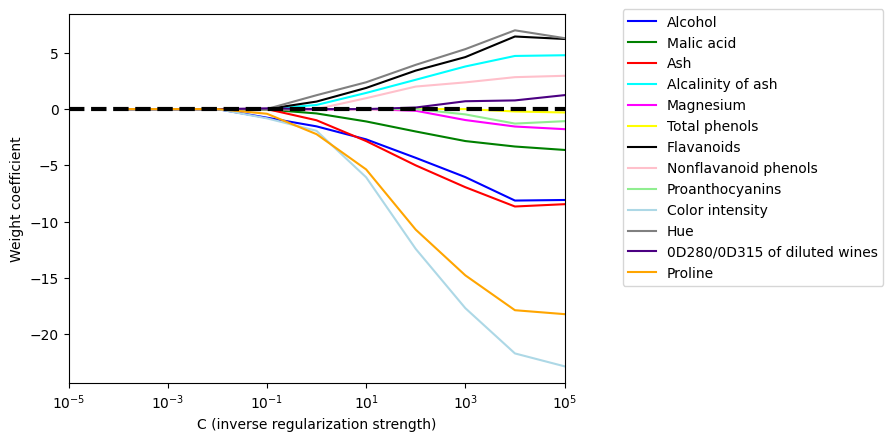

In [34]:
### 규제 강도를 달리한 특성의 가중치 변화
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []

for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column + 1], color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='best')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

#### 4.5.4 순차 특성 선택 알고리즘

모델 복잡도를 줄이고 과대적합을 피하는 다른 방법 : 특성 선택을 통한 **차원 축소**
- 특성 선택 : 원본 특성에서 일부를 선택
- 특성 추출 : 일련의 특성에서 얻은 정보로 새로운 특성을 만듦   


##### 순차 특성 선택 알고리즘 : 주어진 문제에 가장 관련이 높은 특성 부분 집합을 자동으로 선택하는 것이 목적   
관계없는 특성, 잡음을 제거하여 계산 효율성을 높이고 모델의 일반화 오차를 줄임   
   
   
전통적인 순차 특성 선택 알고리즘 : **순차 후진 선택(SBS)** - 새로운 특성의 부분 공간이 목표하는 특성 개수가 될 때까지 전체 특성에서 순차적으로 특성을 제거, 각 단계에서 어떤 특성을 제거할지 판단하기 위해 최대화할 기준 함수를 정의
1. 알고리즘을 k=d로 초기화, d는 전체 특성 공간 $X_d$의 차원
2. 조건 $x^- = argmax J(X_k-x)$를 최대화하는 특성 $x^-$를 결정., 여기에서 $x ∈ X_k$
3. 특성 집합에서 특성 $X^-$를 제거, 즉 $X_{k-1} :=X_k - x^-;k:=k-1$
4. k가 목표하는 특성 개수가 되면 종료, 아니면 단계 2로 돌아감

In [35]:
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS:
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state = 1):
        self.scoring = scoring
        self.estimator = estimator
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

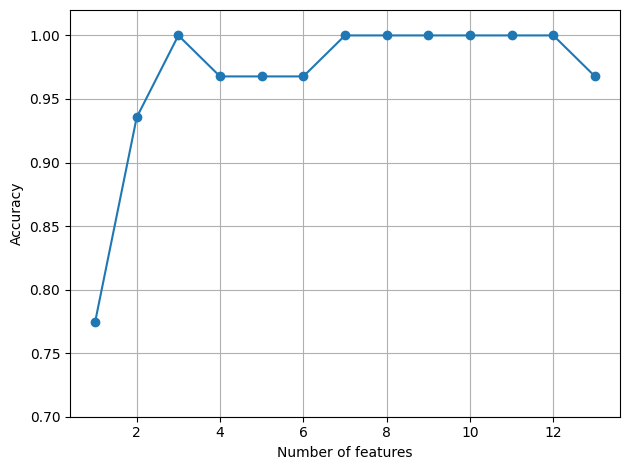

In [37]:
# 특성 개수가 모델 정확도에 미치는 영향
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

### 4.6 랜덤 포레스트의 특성 중요도 사용

랜덤 포레스트를 사용하여 모든 결정 트리에서 계산한 평균적인 불순도 감소로 특성 중요도를 측정 가능   
→ RandomForestClassifier 모델을 훈련한 후 feature_importances_ 속성에서 확인 가능

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) 0D280/0D315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


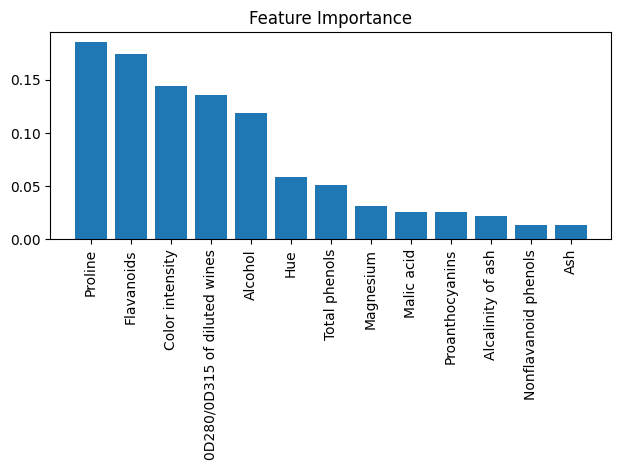

In [38]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" %(f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

가장 판별력이 좋은 특성은 Proline, Flavanoids, Color intensity, OD280/OD315 of diluted wines, Alcohol

*SelectFromModel* : 사용자가 지정한 임계 값을 기반으로 특성을 선택

In [39]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print("이 임계 조건을 만족하는 샘플의 수 : ", X_selected.shape[1])

이 임계 조건을 만족하는 샘플의 수 :  5
